In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
#To visualize the data
import seaborn as sns
#To work with dataframes
import pandas as pd
#To perform numerical operations
import numpy as np
#To partition the data
from sklearn.model_selection import train_test_split
#importing the library for logistic regression
from sklearn.linear_model import LogisticRegression
#importing performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
df=pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X=df[['Engine Size(L)']]
Y=df[["CO2 Emissions(g/km)"]]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5169, 1)
(2216, 1)
(5169, 1)
(2216, 1)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
regr.predict(X_test)

array([[218.9510571 ],
       [244.67850377],
       [244.67850377],
       ...,
       [274.08129997],
       [274.08129997],
       [207.92500852]])

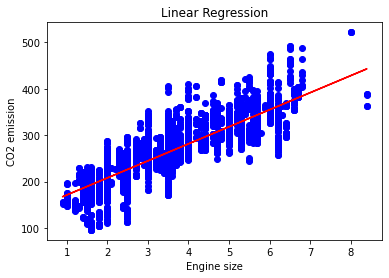

In [15]:
plt.scatter(X, Y, color = 'blue') 
plt.plot(X, regr.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Engine size') 
plt.ylabel('CO2 emission') 
plt.show()


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state = 0)
#fitting the values for x and y
logr=logistic.fit(X_train,Y_train)
#To display the fitting function attributes such as coef,intercept etc..
#print(logistic.coef_)
#print(logistic.intercept_)
#prediction from the test data
prediction=logistic.predict(X_test)
#print("Logistic Regression 20 classified values:")
print(prediction)

[221 242 242 ... 294 294 209]


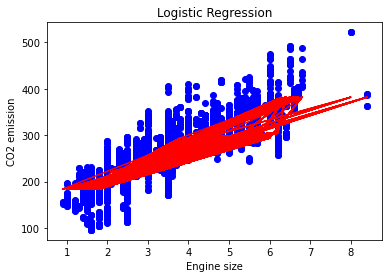

In [18]:
plt.scatter(X, Y, color = 'blue') 
plt.plot(X, logr.predict(X), color = 'red') 
plt.title('Logistic Regression') 
plt.xlabel('Engine size') 
plt.ylabel('CO2 emission') 
plt.show()


In [19]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn = confusion_matrix(Y_test, prediction).ravel()
fp= confusion_matrix(Y_test, prediction).ravel()
fn=confusion_matrix(Y_test, prediction).ravel()
tp=confusion_matrix(Y_test, prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


True Negatives:  [0 0 0 ... 0 0 0]
False Positives:  [0 0 0 ... 0 0 0]
False Negatives:  [0 0 0 ... 0 0 0]
True Positives:  [0 0 0 ... 0 0 0]


In [20]:
#model evaluation using classification metrics
#confusion metrics - To display correctly classified data 
#and wrongly classified data
confus_matrix=confusion_matrix(Y_test,prediction)
np.set_printoptions(precision=2)
print("Confusion matrix")
print(confus_matrix)

Confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
#Calculate the accuracy
accu_score=accuracy_score(Y_test,prediction)
print("Accuracy")
print(accu_score)


Accuracy
0.03023465703971119


In [22]:
from sklearn.metrics import  classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         106       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         4
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00         1
         117       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         3
         121       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         2
         129       0.00      0.00      0.00         2
         130       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         4
         132       0.00      0.00      0.00         3
         133       0.00      0.00      0.00         1
         135       0.00      0.00      0.00         1
         136       0.00    

In [23]:
df.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)
df.rename(columns={'Engine Size(L)' : 'Enginesize'}, inplace=True)
df.rename(columns={'Fuel Consumption City (L/100 km)' : 'fuelconsumptioncity'}, inplace=True)
df.rename(columns={'Fuel Consumption Hwy (L/100 km)' : 'fuelconsumptionhwy'}, inplace=True)
df.rename(columns={'Fuel Consumption Comb (L/100 km)' : 'fuelconsumptioncomb'}, inplace=True)
df.rename(columns={'Fuel Consumption Comb (mpg)' : 'fuelconsumptioncombmpg'}, inplace=True)

In [24]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr',solver='liblinear',random_state = 0)
#fitting the values for x and y
logr=logistic.fit(X_train,Y_train)
#To display the fitting function attributes such as coef,intercept etc..
#print(logistic.coef_)
#print(logistic.intercept_)
#prediction from the test data
prediction=logistic.predict(X_test)
#print("Logistic Regression 20 classified values:")
print(prediction)


[221 242 242 ... 294 294 221]


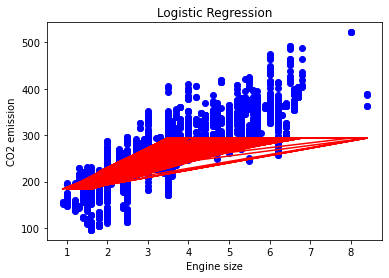

In [25]:
plt.scatter(X, Y, color = 'blue') 
plt.plot(X, logr.predict(X), color = 'red') 
plt.title('Logistic Regression') 
plt.xlabel('Engine size') 
plt.ylabel('CO2 emission') 
plt.show()


In [26]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn = confusion_matrix(Y_test, prediction).ravel()
fp= confusion_matrix(Y_test, prediction).ravel()
fn=confusion_matrix(Y_test, prediction).ravel()
tp=confusion_matrix(Y_test, prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  [0 0 0 ... 0 0 0]
False Positives:  [0 0 0 ... 0 0 0]
False Negatives:  [0 0 0 ... 0 0 0]
True Positives:  [0 0 0 ... 0 0 0]


In [27]:
#model evaluation using classification metrics
#confusion metrics - To display correctly classified data 
#and wrongly classified data
confus_matrix=confusion_matrix(Y_test,prediction)
np.set_printoptions(precision=2)
print("Confusion matrix")
print(confus_matrix)

Confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
#Calculate the accuracy
accu_score=accuracy_score(Y_test,prediction)
print("Accuracy")
print(accu_score)


Accuracy
0.02527075812274368


In [29]:
from sklearn.metrics import  classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         106       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         4
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00         1
         117       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         3
         121       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         2
         129       0.00      0.00      0.00         2
         130       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         4
         132       0.00      0.00      0.00         3
         133       0.00      0.00      0.00         1
         135       0.00      0.00      0.00         1
         136       0.00    

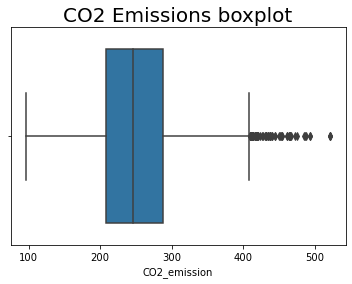

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df.CO2_emission)
plt.title('CO2 Emissions boxplot', fontsize = 20)
plt.show()


In [31]:
df.corr().CO2_emission.sort_values()[::-1]

CO2_emission              1.000000
fuelconsumptioncity       0.919592
fuelconsumptioncomb       0.918052
fuelconsumptionhwy        0.883536
Enginesize                0.851145
Cylinders                 0.832644
fuelconsumptioncombmpg   -0.907426
Name: CO2_emission, dtype: float64

In [32]:
df['CO2_emission'].sort_values()

5931     96
6950     96
3824     96
4900     96
6949     99
       ... 
6046    493
7059    493
5575    522
6640    522
4509    522
Name: CO2_emission, Length: 7385, dtype: int64

<AxesSubplot:xlabel='CO2_emission', ylabel='Density'>

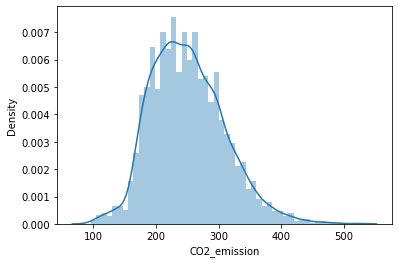

In [33]:
import seaborn as sns
sns.distplot(df['CO2_emission'])

In [34]:
lower_limit = df['CO2_emission'].mean() - 3*df['CO2_emission'].std()
print(lower_limit)
upper_limit = df['CO2_emission'].mean() + 3*df['CO2_emission'].std()
print(upper_limit)

75.04666053038923
426.1227368968281


In [35]:
#Detecting Outliers
Price_Outliers = df[(df['CO2_emission']>upper_limit) | (df['CO2_emission']<lower_limit)]
print(len(Price_Outliers))

45


In [36]:
# Creating new Dataframe by removing Outliers
df_no_co2emission_Outliers = df[(df['CO2_emission']>lower_limit) & (df['CO2_emission']<upper_limit)]
df_no_co2emission_Outliers.shape

(7340, 12)

In [37]:
df1=df.copy()

In [38]:
df1['CO2_emission'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2_emission, dtype: float64

<AxesSubplot:xlabel='CO2_emission', ylabel='Density'>

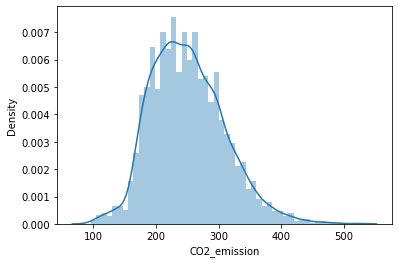

In [39]:
# Before imputing Outliers
import seaborn as sns
sns.distplot(df1['CO2_emission'])

In [40]:
# Imputing 'Price' Outliers

df1.loc[df1.CO2_emission>upper_limit,'CO2_emission']=upper_limit
df1.loc[df1.CO2_emission<lower_limit,'CO2_emission']=lower_limit
df1['CO2_emission'].describe()
#df1['Price'].unique()
#df1 = df1[(df1['Price']>upper_limit) | (df1['Price']<lower_limit)]
#print(len(df1))

count    7385.000000
mean      250.401696
std        57.879119
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       426.122737
Name: CO2_emission, dtype: float64

<AxesSubplot:xlabel='CO2_emission', ylabel='Density'>

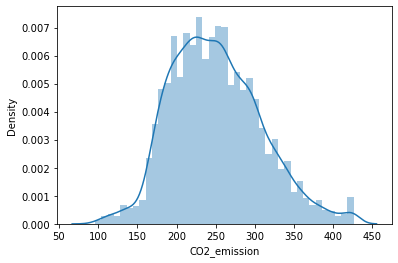

In [41]:
# After imputing Outliers
import seaborn as sns
sns.distplot(df1['CO2_emission'])

In [42]:
df1['CO2_emission'].describe()

count    7385.000000
mean      250.401696
std        57.879119
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       426.122737
Name: CO2_emission, dtype: float64

In [43]:
q1 = df['CO2_emission'].quantile(0.25)
q3 = df['CO2_emission'].quantile(0.75)
IQR = q3 - q1
print(q1,q3,IQR)
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

208.0 288.0 80.0
88.0
408.0


In [44]:
CO2_Outliers = df[(df['CO2_emission']>upper_limit) | (df['CO2_emission']<lower_limit)]
print(len(CO2_Outliers))

80


In [45]:
# Imputing 'CC' Outliers

df1.loc[df1.CO2_emission>upper_limit,'CO2_emission']=upper_limit
df1.loc[df1.CO2_emission<lower_limit,'CO2_emission']=lower_limit
df1['CO2_emission'].describe()
#df1 = df1[(df1['CC']>upper_limit) | (df1['CC']<lower_limit)]
#print(len(df1))

count    7385.000000
mean      250.254976
std        57.457501
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       408.000000
Name: CO2_emission, dtype: float64

In [46]:
df1['CO2_emission'].describe()

count    7385.000000
mean      250.254976
std        57.457501
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       408.000000
Name: CO2_emission, dtype: float64

In [47]:
df1['zscore'] = ( df1['CO2_emission'] - df1['CO2_emission'].mean() ) / df1['CO2_emission'].std()
df1.head()   

,Make,Model,Vehicle Class,Enginesize,Cylinders,Transmission,Fuel Type,fuelconsumptioncity,fuelconsumptionhwy,fuelconsumptioncomb,fuelconsumptioncombmpg,CO2_emission,zscore
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196.0,-0.944263
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221.0,-0.509159
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136.0,-1.988513
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255.0,0.082583
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244.0,-0.108863


In [48]:
# Imputing 'CO2_emission' Outliers 

lower_limit = df['CO2_emission'].mean() - 3*df['CO2_emission'].std()
upper_limit = df['CO2_emission'].mean() + 3*df['CO2_emission'].std()
df1.loc[df1.CO2_emission>upper_limit,'CO2_emission']=upper_limit
df1.loc[df1.CO2_emission<lower_limit,'CO2_emission']=lower_limit

In [49]:
df1.describe()

,Enginesize,Cylinders,fuelconsumptioncity,fuelconsumptionhwy,fuelconsumptioncomb,fuelconsumptioncombmpg,CO2_emission,zscore
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7.385000e+03
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.254976,-2.924953e-17
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,57.457501,1.000000e+00
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000,-2.684680e+00
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000,-7.354127e-01
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000,-7.405432e-02
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000,6.569207e-01
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,408.000000,2.745421e+00


In [50]:
df1.shape

(7385, 13)

In [51]:
#remove z-score column
df1.drop('zscore',axis=1,inplace=True)
df1.shape

(7385, 12)

In [52]:
df1.columns

Index(['Make', 'Model', 'Vehicle Class', 'Enginesize', 'Cylinders',
       'Transmission', 'Fuel Type', 'fuelconsumptioncity',
       'fuelconsumptionhwy', 'fuelconsumptioncomb', 'fuelconsumptioncombmpg',
       'CO2_emission'],
      dtype='object')